# A simple practice of Support Vector Machine
* A SVM classification model
* Data: coursera machine learning week 2
* SVM model

## The advantages of SVM
* effective in high dimensional spaces
* effective where number of dimensions is greater than the number of samples
* memory efficient
* versatile by applying different Kernel functions

## The disadvantage of SVM
* overfitting, avoid it in choosing Kernel functions and regularization term
* no probability estimations

In [77]:
import pandas as pd
df = pd.read_csv('./ex2data1.txt', names=['score1', 'score2', 'admitted'])

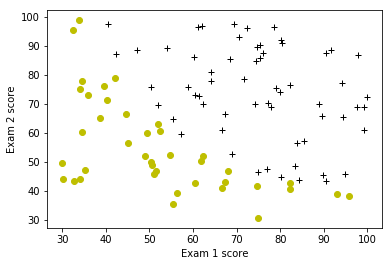

In [78]:
def plotData(df):
    from matplotlib import pyplot as plt
    x1 = df[df['admitted']==1]['score1']
    x2 = df[df['admitted']==0]['score1']
    y1 = df[df['admitted']==1]['score2']
    y2 = df[df['admitted']==0]['score2']    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    return (fig, ax)

fig, ax = plotData(df)

# Linear SVM model
## Important parameters
* **X**: an array [n_samples, n_features]
* **y**: an array [n_samples]
* **penalty**: "l1" or "l2"
* **loss**: 'hinge', or 'squared_hinge'
* **tol**:  0.0001
* **C**: penalty of the misclassified error, a model with large C try to classifiy all the examples correctly
* **class_weight**: 'balanced'

## About the hinge loss function
The hinge loss function is $h(x) = max(1-x, 0)$  
The squared hinge loss function is $h^2(x)$  

The hinge function is not differentiable at $x=1$, we define
$h'(1) = c$, for $-1\le c \le 0$  
The squared hinge function is differentiable at $x=1$, $h'(1) = 0$

The overall cost function
$$
\underset{\theta}{\mathrm{min}}\;C\sum_{i=1}^m \left[ y^{(i)} cost_1(\theta^T x^{(i)}) + (1-y^{(i)}) cost_0(\theta^T x^{(i)}) \right] + {1\over 2} \sum_{i=1}^n \theta_j^2
$$

## About Feature Selection
In sklearn, a random number generator to select feature when fitting the model. It is common to have slightly different result for the same input data. It that happened, try with a smaller <mark style="background-color:gray;color:white">tol</mark> parameter

## About the result
Result shows that SVM does not perform good, it may because the data does not have a large margin

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC

X = df.loc[:, ['score1', 'score2']].values
y = df.loc[:, ['admitted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LinearSVC(C=1.0, loss='hinge', class_weight=None, tol=1e-4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print("accuracy_score is %.5f" %accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        14
          1       0.53      1.00      0.70        16

avg / total       0.28      0.53      0.37        30



C:\Users\lzhen\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


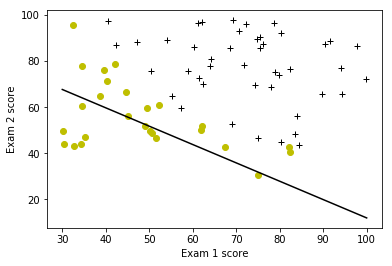

In [214]:
import numpy as np
def plotBoundary(model, X, y):
    from matplotlib import pyplot as plt
    x1 = X[y==1,0]
    x2 = X[y==0,0]
    y1 = X[y==1,1]
    y2 = X[y==0,1]    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    
    a = model.coef_[0]
    b = model.intercept_[0]
    xx = np.linspace(30,100)
    yy = (-a[0]*xx - b)/a[1]
    ax.plot(xx, yy, 'k-')

plotBoundary(model, X_train, y_train)

In [58]:
def plotPrediction(df):
    from matplotlib import pyplot as plt
    fig, ax = plotData(df) 
    

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

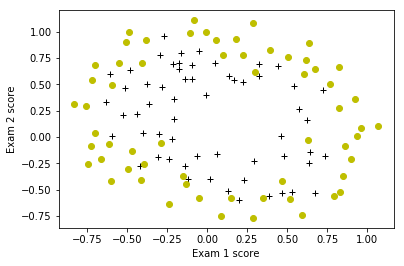

In [27]:
df2 = pd.read_csv('./ex2data2.txt', names=['score1', 'score2', 'admitted'])
fig, ax = plotData(df2)